In [1]:
# 1. Create new notebook at colab.research.google.com
# 2. Enable GPU: Runtime → Change runtime type → GPU → T4

!git clone https://github.com/PP-695/metalora.git
%cd metalora


# !git checkout copilot/implement-class-aware-metalora

Cloning into 'metalora'...
remote: Enumerating objects: 257, done.
remote: Counting objects: 100% (257/257), done.
remote: Compressing objects: 100% (171/171), done.
remote: Total 257 (delta 92), reused 233 (delta 74), pack-reused 0 (from 0)
Receiving objects: 100% (257/257), 18.74 MiB | 21.44 MiB/s, done.
Resolving deltas: 100% (92/92), done.
/content/metalora


In [2]:
# Core ML / utils packages (quiet)
!pip install -q \
  torch torchvision torchaudio \
  colorama timm ftfy regex tqdm tensorboard \
  scikit-learn scipy pyyaml safetensors \
  omegaconf yacs ipdb python-dotenv torch-tb-profiler


# Check GPU and torch info
!nvidia-smi

import torch, sys
print("PyTorch:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())
print("CUDA version (torch):", torch.version.cuda)
print("Device count:", torch.cuda.device_count())
if torch.cuda.is_available():
    print("Current device name:", torch.cuda.get_device_name(0))


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 27.6 MB/s eta 0:00:00
Tue Nov 18 09:01:42 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |


In [3]:
# 1. Install required packages
!pip install -U huggingface_hub
!pip install hf_transfer

# 2. Download and extract using Python API
import os
from huggingface_hub import hf_hub_download

# Set up fast transfer
os.environ['HF_HUB_ENABLE_HF_TRANSFER'] = '1'

# Create data directory in root
!mkdir -p ./cifar-100-python

# Download CIFAR-100 tar.gz file
print("Downloading CIFAR-100...")
downloaded_file = hf_hub_download(
    repo_id="doem1997/rs_lt",
    filename="cifar-100-python.tar.gz",
    repo_type="dataset",
    local_dir="./",
    local_dir_use_symlinks=False
)
print(f"Downloaded to: {downloaded_file}")

# 3. Extract the archive directly to root
print("Extracting...")
!tar -xzf ./cifar-100-python.tar.gz -C ./

# 4. Flatten the directory structure
!mv ./cifar-100-python/cifar-100-python/* ./cifar-100-python/ 2>/dev/null || true
!rm -rf ./cifar-100-python/cifar-100-python

# 5. Verify
print("\nFiles in cifar-100-python directory:")
!ls -la ./cifar-100-python/

# Clean up tar.gz to save space
!rm ./cifar-100-python.tar.gz

print("\n✅ CIFAR-100 setup complete!")
print("Use: root=./cifar-100-python")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 515.6/515.6 kB 18.5 MB/s eta 0:00:00
  Attempting uninstall: huggingface_hub
    Found existing installation: huggingface-hub 0.36.0
    Uninstalling huggingface-hub-0.36.0:
      Successfully uninstalled huggingface-hub-0.36.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
transformers 4.57.1 requires huggingface-hub<1.0,>=0.34.0, but you have huggingface-hub 1.1.4 which is incompatible.


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_validators.py:202: UserWarning: The `local_dir_use_symlinks` argument is deprecated and ignored in `hf_hub_download`. Downloading to a local directory does not use symlinks anymore.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


cifar-100-python.tar.gz:   0%|          | 0.00/170M [00:00<?, ?B/s]

Downloaded to: cifar-100-python.tar.gz
Extracting...

Files in cifar-100-python directory:
total 183364
drwxr-xr-x  2 1000 1000      4096 Oct 16  2024 .
drwxr-xr-x 17 root root      4096 Nov 18 09:02 ..
-rw-r--r--  1 root root    307989 Oct 16  2024 clsmean_in21k_vit_b16.pth
-rw-r--r--  1 root root    410389 Oct 16  2024 clsmean_in21k_vit_l16.pth
-rw-r--r--  1 1000 1000         0 Feb 19  2010 file.txt~
-rw-r--r--  1 1000 1000      1473 Feb 20  2010 meta
-rw-r--r--  1 1000 1000  31049707 Feb 18  2010 test
-rw-r--r--  1 1000 1000 155249918 Feb 18  2010 train
-rw-r--r--  1 root root    307986 Oct 16  2024 txtfeat_clip_vit_b16.pth
-rw-r--r--  1 root root    410386 Oct 16  2024 txtfeat_clip_vit_l14.pth

✅ CIFAR-100 setup complete!
Use: root=./cifar-100-python


In [4]:
# ================================================
# CELL 1: Setup Environment for Single GPU
# ================================================

import os

# Configure for single T4 GPU
os.environ.update({
    'RANK': '0',
    'WORLD_SIZE': '1',
    'MASTER_ADDR': 'localhost',
    'MASTER_PORT': '12355',
    'LOCAL_RANK': '0',
    'CUDA_VISIBLE_DEVICES': '0',
    'TG_BOT_TOKEN' : '8295481578:AAHincS6uHZhsMslX2fhUfPvfOeSneovncc',
    'TG_CHAT_ID' : '1769649694'
})

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ['HF_HUB_DISABLE_PROGRESS_BARS'] = '1'
from huggingface_hub.utils import disable_progress_bars
disable_progress_bars()


print("✓ Environment configured for T4 GPU training")

✓ Environment configured for T4 GPU training


In [6]:
# # ================================================
# # CELL 2: Quick 1-Epoch Test (~6 minutes)
# # ================================================

# # !python main.py \
# #   --dataset cifar100_ir100 \
# #   --model clip_vit_b16 \
# #   --tuner class_aware_lora \
# #   --opts \
# #     use_class_aware=True \
# #     num_epochs=1 \
# #     batch_size=64 \
# #     seed=42

In [12]:
!python main.py \
  --dataset cifar100_ir100 \
  --model clip_vit_b16 \
  --tuner flora \
  --opts \
    use_meta=True \
    meta_lr=0.001 \
    num_epochs=1 \
    batch_size=64 \
    seed=0 \
    eval_freq=1

E0000 00:00:1763457101.738560    4502 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1763457101.745006    4502 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1763457101.761111    4502 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1763457101.761143    4502 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1763457101.761147    4502 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1763457101.761151    4502 computation_placer.cc:177] computation placer already registered. Please check linka

In [7]:
# AFML Work
!python main.py \
  --dataset cifar100_ir100 \
  --model clip_vit_b16 \
  --tuner class_aware_lora \
  --opts \
    use_class_aware=True \
    num_epochs=1 \
    batch_size=64 \
    seed=0 \
    eval_freq=1

E0000 00:00:1763456551.358685    1798 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1763456551.390038    1798 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1763456551.459686    1798 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1763456551.459731    1798 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1763456551.459739    1798 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1763456551.459746    1798 computation_placer.cc:177] computation placer already registered. Please check linka

In [9]:
# !python scripts/plot_training_curves.py \
#   --run baseline=/content/metalora/output/cifar100_ir100/clip_vit_b16/flora/use_meta_meta_lr_0_001_num_epochs_1_batch_size_64_seed_0_eval_freq_1/tensorboard \
#   --run classaware=/content/metalora/output/cifar100_ir100/clip_vit_b16/class_aware_lora/use_class_aware_num_epochs_1_batch_size_64_seed_0_eval_freq_1/tensorboard \
#   --tags test/accuracy test/macro_f1 train/acc.avg train/loss.avg

python3: can't open file '/content/metalora/scripts/plot_training_curves.py': [Errno 2] No such file or directory


In [13]:
import argparse
import csv
import os
from collections import defaultdict
from pathlib import Path
from typing import Dict, Iterable, List, Tuple

from tensorboard.backend.event_processing import event_accumulator

try:
    import matplotlib.pyplot as plt
except ImportError as exc:  # pragma: no cover
    raise SystemExit(
        "matplotlib is required for plotting. Install it via `pip install matplotlib`."
    ) from exc

DEFAULT_TAGS = {
    "train/loss.avg": "Train Loss",
    "train/acc.avg": "Train Accuracy",
    "train/mean_acc": "Mean-Class Accuracy",
    "train/many_acc": "Head Accuracy",
    "train/few_acc": "Tail Accuracy",
    "test/accuracy": "Eval Accuracy",
    "test/macro_f1": "Macro F1",
}


def parse_run_args(entries: Iterable[str]) -> List[Tuple[str, Path]]:
    runs: List[Tuple[str, Path]] = []
    for raw in entries:
        if "=" in raw:
            label, raw_path = raw.split("=", 1)
        else:
            raw_path = raw
            label = Path(raw_path).name
        run_path = Path(raw_path).expanduser().resolve()
        runs.append((label.strip(), run_path))
    return runs


def locate_event_dir(run_path: Path) -> Tuple[Path, Path]:
    """Return (run_root, event_dir) for a training run.

    The user can point to either the run root (containing `tensorboard/`) or the
    tensorboard directory itself. We pick the most sensible defaults.
    """

    if run_path.is_dir():
        tensorboard_dir = run_path / "tensorboard"
        if tensorboard_dir.is_dir() and list(tensorboard_dir.glob("events.*")):
            return run_path, tensorboard_dir
        if list(run_path.glob("events.*")):
            return run_path.parent, run_path
    elif run_path.is_file() and run_path.name.startswith("events."):
        return run_path.parent.parent, run_path.parent

    raise FileNotFoundError(
        f"Could not find TensorBoard event files under {run_path}. "
        "Point to the training output directory or its tensorboard subfolder."
    )


def load_scalars(event_dir: Path, tags: Iterable[str]) -> Dict[str, List[event_accumulator.ScalarEvent]]:
    accumulator = event_accumulator.EventAccumulator(
        str(event_dir),
        size_guidance={event_accumulator.SCALARS: 0},
    )
    accumulator.Reload()
    available = set(accumulator.Tags().get("scalars", []))

    scalar_data: Dict[str, List[event_accumulator.ScalarEvent]] = {}
    for tag in tags:
        if tag not in available:
            continue
        scalar_data[tag] = accumulator.Scalars(tag)
    return scalar_data


def export_csv(events: List[event_accumulator.ScalarEvent], output_file: Path) -> None:
    output_file.parent.mkdir(parents=True, exist_ok=True)
    with output_file.open("w", newline="") as f:
        writer = csv.writer(f)
        writer.writerow(["step", "value", "wall_time"])
        for ev in events:
            writer.writerow([ev.step, ev.value, ev.wall_time])


def plot_metric(tag: str, title: str, series: Dict[str, List[event_accumulator.ScalarEvent]], output_dir: Path) -> None:
    if not series:
        return
    output_dir.mkdir(parents=True, exist_ok=True)

    single_point_series = all(len(events) <= 1 for events in series.values())

    plt.figure(figsize=(7, 4))
    if single_point_series:
        # Plot a bar chart when we only logged final eval metrics (e.g., test accuracy).
        labels = list(series.keys())
        values = [events[-1].value if events else float("nan") for events in series.values()]
        bars = plt.bar(labels, values, color="#4C72B0")
        for bar, value in zip(bars, values):
            plt.text(
                bar.get_x() + bar.get_width() / 2,
                value,
                f"{value:.2f}",
                ha="center",
                va="bottom",
                fontsize=9,
            )
        plt.ylabel(title)
        plt.title(f"{title} (final value)")
    else:
        for label, events in series.items():
            steps = [ev.step for ev in events]
            values = [ev.value for ev in events]
            plt.plot(steps, values, label=label)

        plt.title(title)
        plt.xlabel("Step")
        plt.ylabel(title)
        plt.grid(True, linestyle="--", alpha=0.3)
        plt.legend()

    safe_name = tag.replace("/", "_")
    output_path = output_dir / f"{safe_name}.png"
    plt.tight_layout()
    plt.savefig(output_path, dpi=200)
    plt.close()
    print(f"Saved plot: {output_path}")


def main() -> None:
    parser = argparse.ArgumentParser(description="Export and plot TensorBoard metrics.")
    parser.add_argument(
        "--run",
        action="append",
        required=True,
        help="Provide runs as label=PATH. Label defaults to the folder name when omitted.",
    )
    parser.add_argument(
        "--tags",
        nargs="*",
        default=list(DEFAULT_TAGS.keys()),
        help="TensorBoard scalar tags to export. Defaults cover the most useful metrics.",
    )
    parser.add_argument(
        "--out",
        type=str,
        default=None,
        help="Directory for comparison plots (defaults to ./comparison_plots).",
    )
    # Simulate command-line arguments for Colab execution
    args = parser.parse_args([

        '--run', 'class_aware_lora=/content/metalora/output/cifar100_ir100/clip_vit_b16/class_aware_lora/use_class_aware_num_epochs_1_batch_size_64_seed_0_eval_freq_1/tensorboard',
        '--run', 'flora_meta=/content/metalora/output/cifar100_ir100/clip_vit_b16/flora/use_meta_meta_lr_0_001_num_epochs_1_batch_size_64_seed_0_eval_freq_1/tensorboard'
    ])

    runs = parse_run_args(args.run)
    if not runs:
        raise SystemExit("No runs provided.")

    comparison_dir = Path(args.out).expanduser().resolve() if args.out else Path.cwd() / "comparison_plots"
    comparison_dir.mkdir(parents=True, exist_ok=True)

    aggregated: Dict[str, Dict[str, List[event_accumulator.ScalarEvent]]] = defaultdict(dict)

    for label, raw_path in runs:
        run_root, event_dir = locate_event_dir(raw_path)
        scalars = load_scalars(event_dir, args.tags)
        if not scalars:
            print(f"No requested tags found for run '{label}' at {event_dir}.")
            continue
        metrics_dir = run_root / "metrics"
        metrics_dir.mkdir(parents=True, exist_ok=True)

        for tag, events in scalars.items():
            csv_name = f"{label}_{tag.replace('/', '_')}.csv"
            export_csv(events, metrics_dir / csv_name)
            aggregated[tag][label] = events
            print(f"Exported {tag} for '{label}' -> {metrics_dir / csv_name}")

    for tag in args.tags:
        pretty_title = DEFAULT_TAGS.get(tag, tag)
        plot_metric(tag, pretty_title, aggregated.get(tag, {}), comparison_dir)

    print("All done. Drop the generated CSV files into your paper tables and use the PNGs as figures.")


if __name__ == "__main__":
    main()

Exported train/loss.avg for 'class_aware_lora' -> /content/metalora/output/cifar100_ir100/clip_vit_b16/class_aware_lora/use_class_aware_num_epochs_1_batch_size_64_seed_0_eval_freq_1/metrics/class_aware_lora_train_loss.avg.csv
Exported train/acc.avg for 'class_aware_lora' -> /content/metalora/output/cifar100_ir100/clip_vit_b16/class_aware_lora/use_class_aware_num_epochs_1_batch_size_64_seed_0_eval_freq_1/metrics/class_aware_lora_train_acc.avg.csv
Exported train/mean_acc for 'class_aware_lora' -> /content/metalora/output/cifar100_ir100/clip_vit_b16/class_aware_lora/use_class_aware_num_epochs_1_batch_size_64_seed_0_eval_freq_1/metrics/class_aware_lora_train_mean_acc.csv
Exported train/many_acc for 'class_aware_lora' -> /content/metalora/output/cifar100_ir100/clip_vit_b16/class_aware_lora/use_class_aware_num_epochs_1_batch_size_64_seed_0_eval_freq_1/metrics/class_aware_lora_train_many_acc.csv
Exported train/few_acc for 'class_aware_lora' -> /content/metalora/output/cifar100_ir100/clip_vit_

Found images: ['train_few_acc.png', 'test_accuracy.png', 'train_many_acc.png', 'train_acc.avg.png', 'test_macro_f1.png', 'train_loss.avg.png', 'train_mean_acc.png']


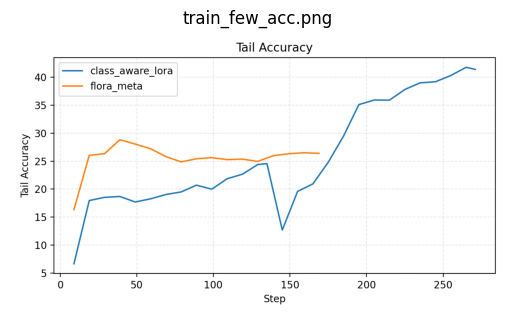

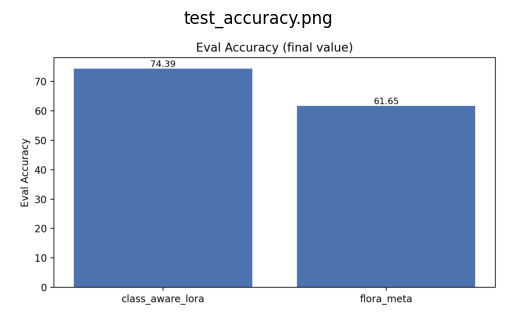

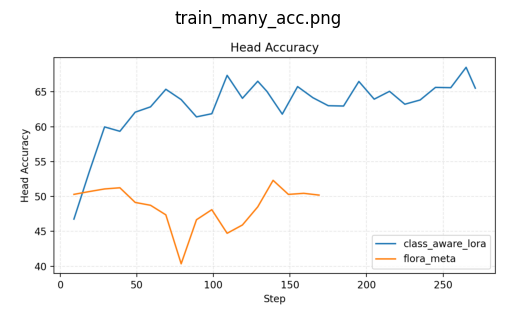

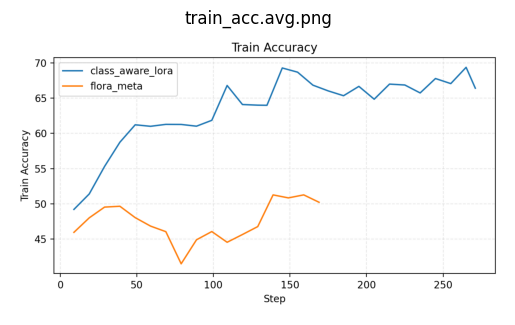

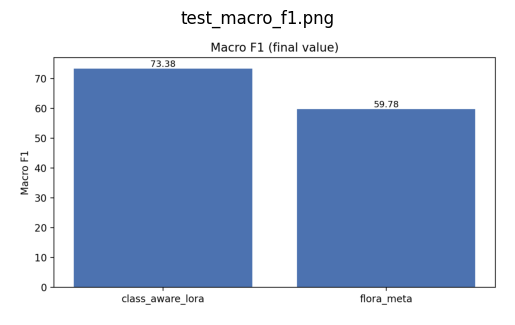

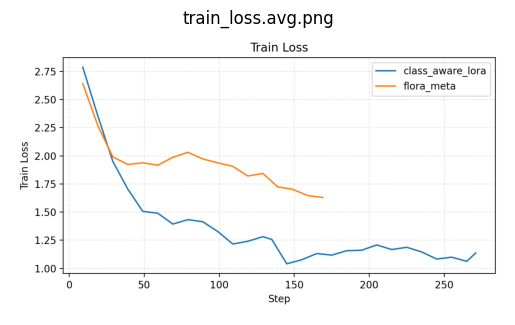

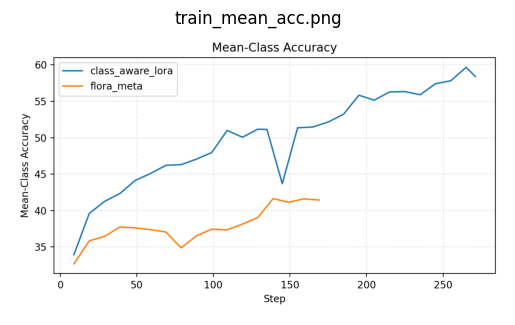

In [14]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# change this to your folder path
folder_path = "/content/metalora/comparison_plots"

# allowed image extensions
image_exts = (".png", ".jpg", ".jpeg", ".bmp", ".gif")

# list all image files
image_files = [f for f in os.listdir(folder_path)
               if f.lower().endswith(image_exts)]

print("Found images:", image_files)

for filename in image_files:
    img_path = os.path.join(folder_path, filename)
    img = Image.open(img_path)

    plt.figure()
    plt.imshow(img)
    plt.axis("off")
    plt.title(filename)
    plt.show()


In [ ]:
# # 8. Save results to Google Drive
# from google.colab import drive
# drive.mount('/content/drive')
# !cp -r output/ /content/drive/MyDrive/metalora_results/